## Simulation for biallelic dynamics of SCN1A

In [2]:
# This only needs to be executed when running off of google drive

# from google.colab import drive
# drive.mount('/content/drive')

!pip install git+https://github.com/roschkoenig/SodMod.git


  Cloning https://github.com/roschkoenig/SodMod.git to /tmp/pip-req-build-y70ny1r_
  Running command git clone -q https://github.com/roschkoenig/SodMod.git /tmp/pip-req-build-y70ny1r_
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovqhpmzk/wheels/07/ed/a1/0bc1410b394766c57f600844bcb0d8e79e024d8e5633a74295
Successfully built sodmod


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from scipy.integrate import odeint

import sodmod as sm
from sodmod import params as pr
from sodmod import cells as cl

In [2]:
# adapted from https://gist.github.com/...
#    giuseppebonaccorso/60ce3eb3a829b94abf64ab2b7a56aaef

# Solve ODE system
#---------------------------------------------------------------------------
np.random.seed(1000)
Y0 = [-40,1.,0.,0.]
T  = np.linspace(0,100,10000)
p  = pr.params('TI37')
Vy = odeint(cl.IN, Y0, T, args=(p,))


/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:14: RuntimeWarning: invalid value encountered in double_scalars
  alpha_m  = (-0.32*(Vm-Vt-13.0)) / (np.exp(-(Vm-Vt-13.0)/4)-1)
/Volumes/GoogleDrive/My Drive/Research/1906 SCN1A Biallelic Dynamics/02 - Scripts/sodmod/sodmod/chans.py:15: RuntimeWarning: invalid value encountered in double_scalars
  beta_m   = (0.28*(Vm-Vt-40.0)) / (np.exp((Vm-Vt-40.0)/5)-1)


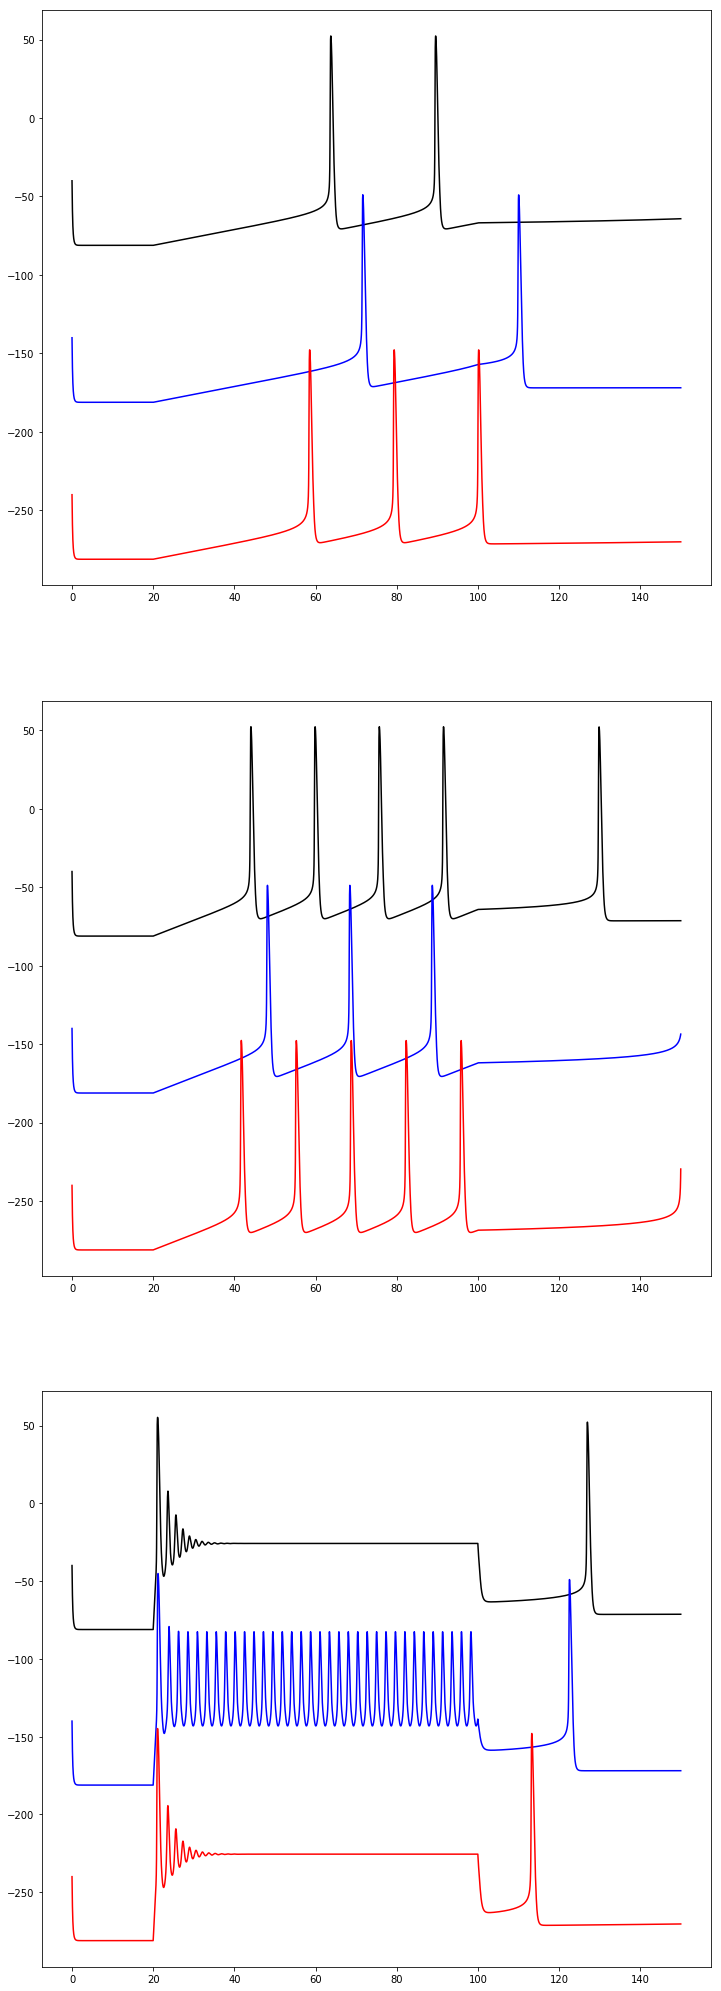

In [5]:
# Solve ODE system
#--------------------------------------------------------------------
reload(pr)
reload(cl)
reload(sm.incurr)

np.random.seed(1000)
Y0 = [-40,1.,0.,0.]
T  = np.linspace(0,150,10000)

conds = ['WT37', 'AS37', 'TI37']
cols  = ['k', 'b', 'r']
I_scl = [.5, 1., 50]

fig, ax = plt.subplots(len(I_scl),1, figsize=(12, len(I_scl)*12))

for i in range(len(I_scl)):
    for ci in range(len(conds)):
        Vy      = odeint(cl.IN, Y0, T, 
                         args=(pr.params(conds[ci], I_scale = I_scl[i]),))
        ax[i].plot(T, Vy[:,0]-ci*100, cols[ci])    


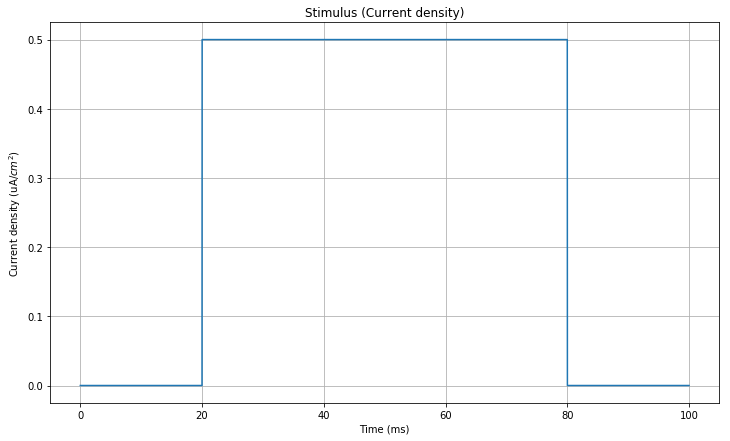

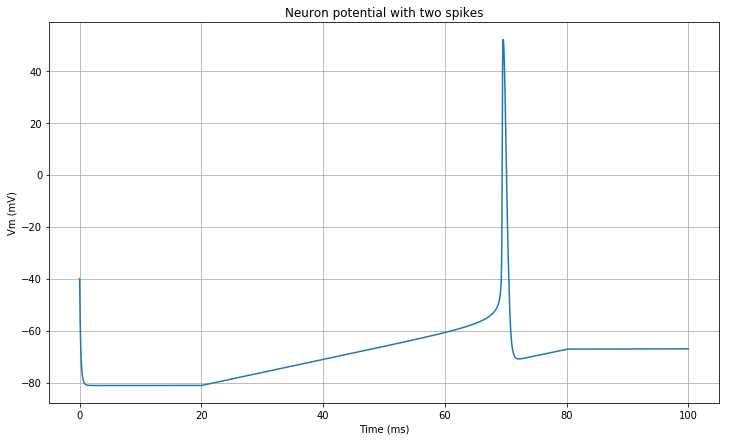

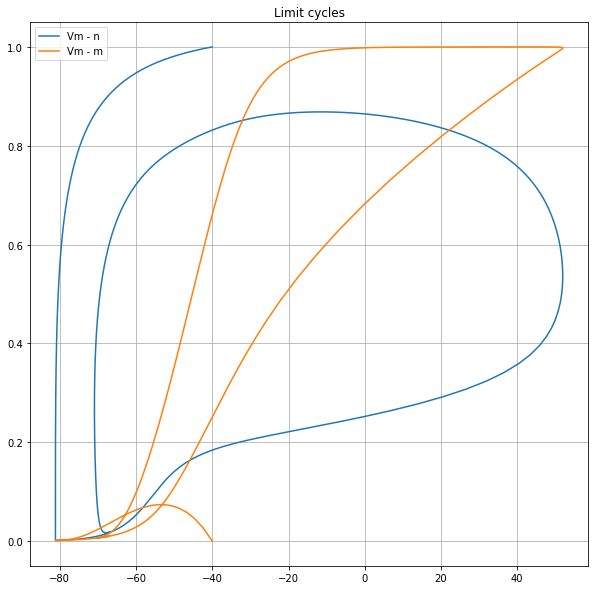

In [ ]:
# Input stimulus
from sba_mod_input import Id
Idv = [Id(t) for t in T]
snames = params()['snames_IN']

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, snames.index('Vm')])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
plt.grid()

# Trajectories with limit cycles
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Vy[:, snames.index('Vm')], Vy[:, snames.index('m_K')], label='Vm - n')
ax.plot(Vy[:, snames.index('Vm')], Vy[:, snames.index('m_Na')], label='Vm - m')
ax.set_title('Limit cycles')
ax.legend()
plt.grid()

In [ ]:
temp = 37 + 273
p = params()
(0.0863 * temp)/p['s_h']

6.621056620907866

In [ ]:
from sba_mod_params import exvals, params

In [ ]:
params()['V2_m']

-37.02566313719245

In [ ]:
(0.0, 7.4143713948380565, 0.0, 4.040593749873669, 0.0191)